The concept of first and last frost dates is essential in the context of gardening and agriculture, as it helps in determining the suitable planting and harvesting times. A frost date typically refers to when temperatures are expected to fall to the threshold level that can cause damage to plants. This is generally at or below 0°C. It's important to note that these frost dates are not absolute but are probabilistic estimates based on historical data.

In addition to the first and last frost dates, the concept of the "frost-free window" or "growing season" refers to the period between the last spring frost and the first fall frost, during which temperatures are generally above the freezing point.

The length of the frost-free window varies depending on the geographical location and local climatic conditions. For instance, in warmer regions, this period may be quite long, allowing for an extended growing season suitable for a wide variety of crops. In contrast, colder regions may have a shorter frost-free window, limiting the types of plants that can be grown.

In this exercise we will use a long-term dataset from 1980 to 2020 to estimate the:

- typical date for first and last frost
- frost-free period
- probability density and cumulative density functions


In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# Read data
df = pd.read_csv('../datasets/Johnson_Kansas.csv', parse_dates=['timestamp'])
df.head(3)


,id,longitude,latitude,timestamp,doy,pr,rmax,rmin,sph,srad,...,tmmn,tmmx,vs,erc,eto,bi,fm100,fm1000,etr,vpd
0,19800101,-94.822258,38.883761,1980-01-01,1,0.0,77.683876,43.286247,0.002620,8.263647,...,-3.557654,7.847253,2.192723,40.656410,1.040586,29.367460,13.726248,13.835570,1.627161,0.353715
1,19800102,-94.822258,38.883761,1980-01-02,2,0.0,78.571579,35.635567,0.002420,7.208553,...,-3.577643,5.967126,3.296802,41.918404,1.219669,35.399471,13.522950,13.820871,1.931061,0.320570
2,19800103,-94.822258,38.883761,1980-01-03,3,0.0,82.316978,39.000980,0.001985,5.930851,...,-7.448096,0.307275,3.042193,40.172096,0.770442,32.923172,13.797589,13.864967,1.172392,0.174911


In [4]:
# Add year column. This will help us grouping analyses by year.
df['year'] = df['timestamp'].dt.year


## Find date of last frost

In [5]:
# Define variables for last frost
lf_start_doy = 1
lf_end_doy = 183 # Around July 15 (to be on the safe side)
freeze_temp = 0 # Celsius


In [6]:
# Get unique years
unique_years = df['year'].unique()
lf_doy = []

for year in unique_years:
    idx_year = df['year'] == year
    idx_lf_period = (df['doy'] > lf_start_doy) & (df['doy'] <= lf_end_doy)
    idx_frost = df['tmmn'] < freeze_temp
    idx = idx_year & idx_lf_period & idx_frost
    
    # Select all DOY for current year that meet all conditions.
    # Sort in ASCENDING order. The last value was the last freezing DOY
    all_doy_current_year = df.loc[idx, 'doy'].sort_values()
    lf_doy.append(all_doy_current_year.iloc[-1])
    

## Find date of first frost

In [7]:
# Define variables for first frost
ff_start_doy = 183 # Around July 15 (to be on the safe side)
ff_end_doy = 365


In [8]:
# Get unique years
ff_doy = []

for year in unique_years:
    idx_year = df['year'] == year
    idx_ff_period = (df['doy'] > ff_start_doy) & (df['doy'] <= ff_end_doy)
    idx_frost = df['tmmn'] < freeze_temp
    idx = idx_year & idx_ff_period & idx_frost
    
    # Select all DOY for current year that meet all conditions.
    # Sort in DESCENDING order. The last value was the last freezing DOY
    all_doy_current_year = df.loc[idx, 'doy'].sort_values(ascending=False)
    ff_doy.append(all_doy_current_year.iloc[-1])
    

## Find median date for first and last frost

In [9]:
# Create dataframe with the first and last frost for each year
# The easiest is to create a dictionary with the variables we already have

df_frost = pd.DataFrame({'year':unique_years,
                         'first_frost_doy':ff_doy,
                         'last_frost_doy':lf_doy})
df_frost.head(3)


,year,first_frost_doy,last_frost_doy
0,1980,299,104
1,1981,296,79
2,1982,294,100


In [10]:
# Print median days of the year
df_frost[['first_frost_doy','last_frost_doy']].median()


first_frost_doy    298.0
last_frost_doy      96.0
dtype: float64

In [12]:
# Compute median DOY and calculate date for first frost
first_frost_median_doy = df_frost['first_frost_doy'].median()
first_frost_median_date = pd.to_datetime('2000-01-01') + pd.Timedelta(first_frost_median_doy, 'days')
print(f"Median date first frost: {first_frost_median_date.strftime('%d-%B')}")

first_frost_earliest_doy = df_frost['first_frost_doy'].min() # Min value for earliest first frost
first_frost_earliest_date = pd.to_datetime('2000-01-01') + pd.Timedelta(first_frost_earliest_doy, 'days')
print(f"Earliest date first frost on record: {first_frost_earliest_date.strftime('%d-%B')}")

# Compute median DOY and calculate date for first frost
last_frost_median_doy = df_frost['last_frost_doy'].median()
last_frost_median_date = pd.to_datetime('2000-01-01') + pd.Timedelta(last_frost_median_doy, 'days')
print(f"Median date last frost: {last_frost_median_date.strftime('%d-%B')}")

last_frost_latest_doy = df_frost['last_frost_doy'].max() # Max value for latest last frost
last_frost_latest_date = pd.to_datetime('2000-01-01') + pd.Timedelta(last_frost_latest_doy, 'days')
print(f"Latest date last frost on record: {last_frost_latest_date.strftime('%d-%B')}")


Median date first frost: 25-October
Earliest date first frost on record: 23-September
Median date last frost: 06-April
Latest date last frost on record: 30-April


## Compute frost-free period 

In [13]:
# Period without any risk of frost
frost_free = first_frost_earliest_doy - last_frost_latest_doy
print(f'Frost-free period: {frost_free} days')


Frost-free period: 146 days


## Probability density functions

Let's first examine if a normal distribution fits the observations using probability plots, which compare the distribution of our data against the quantiles of a specified theoretical distribution (normal distribution in this case, similar to qq-plots). If the agreement is good, then this provides some support for using the selected distribution.


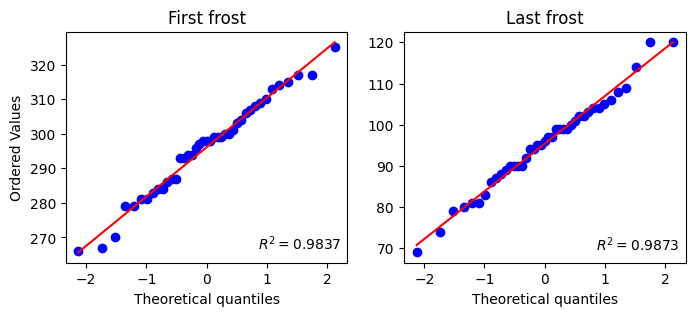

In [50]:
# Check distribution of data
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
stats.probplot(df_frost['first_frost_doy'], dist="norm", rvalue=True, plot=plt)
plt.title('First frost')
plt.subplot(1,2,2)
stats.probplot(df_frost['last_frost_doy'], dist="norm", rvalue=True, plot=plt)
plt.title('Last frost')
plt.ylabel('')
plt.show()


In [56]:
# Fit normal distributions
fitted_pdf_ff = stats.fit(stats.norm, df_frost['first_frost_doy'], bounds=((180,365),(1,25)))
print(fitted_pdf_ff.params)

fitted_pdf_lf = stats.fit(stats.norm, df_frost['last_frost_doy'], bounds=((1,180),(1,25)))
print(fitted_pdf_lf.params)


FitParams(loc=296.12195397938365, scale=13.816206118531046)
FitParams(loc=95.39034225034837, scale=11.17897667307393)


In [57]:
# Create vector for the normal pdf of first frost
x_ff = np.linspace(df_frost['first_frost_doy'].min(), 
                df_frost['first_frost_doy'].max(), 
                num=1000)

# Create vector for the normal pdf of last frost
x_lf = np.linspace(df_frost['last_frost_doy'].min(), 
                df_frost['last_frost_doy'].max(), 
                num=1000)

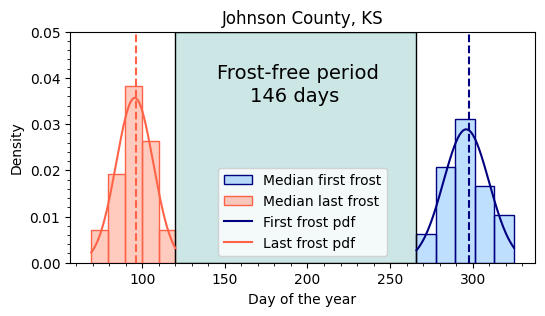

In [61]:
# Figure of free-frost period
plt.figure(figsize=(6,3))
plt.title('Johnson County, KS')

# Add histograms for first and last frost
plt.hist(df_frost['first_frost_doy'], bins='scott', density=True,
         label='Median first frost', facecolor=(0,0.5,1,0.25), edgecolor='navy')
plt.hist(df_frost['last_frost_doy'], bins='scott', density=True,
         label='Median last frost', facecolor=(1,0.2,0,0.25), edgecolor='tomato')

# Add median lines
plt.axvline(last_frost_median_doy, linestyle='--', color='tomato')
plt.axvline(first_frost_median_doy, linestyle='--', color='navy')

# Overlay fitted distributions to each histogram
plt.plot(x_ff, stats.norm.pdf(x_ff, *fitted_pdf_ff.params),
         color='navy', label='First frost pdf')
plt.plot(x_lf, stats.norm.pdf(x_lf, *fitted_pdf_lf.params),
         color='tomato', label='Last frost pdf')

# Add filled area to show the frost-free period
plt.fill_betweenx(np.linspace(0,0.05), last_frost_latest_doy, first_frost_earliest_doy,
                  facecolor=(0, 0.5, 0.5, 0.2), edgecolor='k')

# Add some annotations
plt.text(145, 0.04, "Frost-free period", size=14)
plt.text(165, 0.035, f"{frost_free} days", size=14)

plt.ylim([0, 0.05])
plt.xlabel('Day of the year')
plt.ylabel('Density')
plt.minorticks_on()
plt.legend()
plt.show()


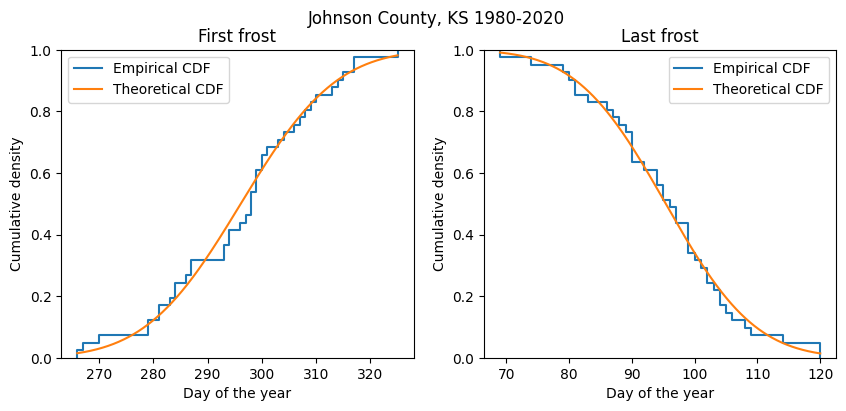

In [71]:
# Cumulative distributions
# Create vector from 0 to x_max to plot the lognorm pdf
x = np.linspace(df_frost['first_frost_doy'].min(),
                df_frost['first_frost_doy'].max(),
                num=1000)

plt.figure(figsize=(10,4))
plt.suptitle('Johnson County, KS 1980-2020')

# First frost
plt.subplot(1,2,1)
plt.ecdf(df_frost['first_frost_doy'], label="Empirical CDF")
plt.plot(x_ff, stats.norm.cdf(x_ff, *fitted_pdf_ff.params), label='Theoretical CDF')
plt.title('First frost')
plt.xlabel('Day of the year')
plt.ylabel('Cumulative density')
plt.legend()

# Last frost (note the use of the complementary CDF)
plt.subplot(1,2,2)
plt.ecdf(df_frost['last_frost_doy'], complementary=True, label="Empirical CDF")
plt.plot(x_lf, 1-stats.norm.cdf(x_lf, *fitted_pdf_lf.params), label='Theoretical CDF')
plt.title('Last frost')
plt.xlabel('Day of the year')
plt.ylabel('Cumulative density')
plt.legend()

plt.show()

In [72]:
# Determine the probability of a first frost occurying on or before:
doy = 245 # September 1
stats.norm.cdf(doy, *fitted_pdf_ff.params)

# As expected, if you change the DOY for a value closer to July 1,
# the chances of frost in the north hemisphere are going to decrease to nearly zero.

0.00010773852588002489

In [83]:
# Determine the probability of a frost occurying on or after:
doy = 122 # May 1
stats.norm.sf(doy, *fitted_pdf_lf.params)

# As expected, if you change the DOY for a value closer to January 1,
# the chances of frost in the north hemisphere are going to increase to 1 (or 100%).

0.008648561213750895